In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from PIL import Image
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train, y_train), (X_test, y_test) =  mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
print(X_train[12])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  12  99  91 142 155 246 182 155 155 155 155 131  52   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 138 254 254 254 254 254 254 254 254 254 254 254 252 210 122
   33   0   0   0   0   0   0   0   0   0]
 [  0   0   0 220 254 254 254 235 189 189 189 189 150 189 205 254 254 254
   75   0   0   0   0   0   0   0   0   0]
 [  0   0   0  35  74  35  35  25   0   0   0   0   0   0  13 22

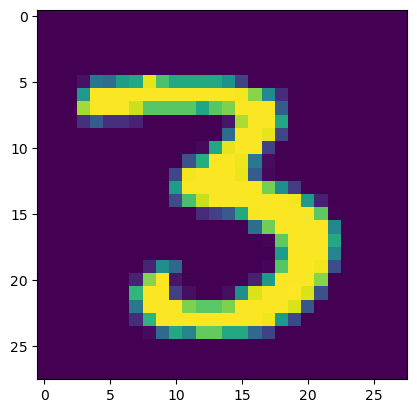

In [8]:
plt.imshow(X_train[12])

In [9]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [10]:
X_train = X_train/255
X_test = X_test/255

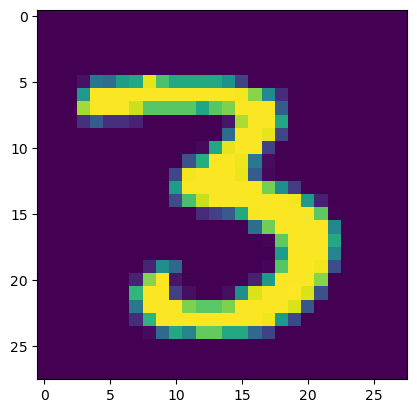

In [11]:
plt.imshow(X_train[12])

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input

In [13]:
model = Sequential()

model.add(Input(shape=(28,28)))

model.add(Flatten())

model.add(Dense(784, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(392, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(196, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(98, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(49, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(24, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10, activation="sigmoid"))

model.compile(optimizer = "adam",
              loss="sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [14]:
model.fit(x=X_train,
         y=y_train,
         validation_data=(X_test, y_test), 
         epochs=10,)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.6342 - loss: 1.0657 - val_accuracy: 0.9352 - val_loss: 0.2441
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9305 - loss: 0.3085 - val_accuracy: 0.9655 - val_loss: 0.1513
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9492 - loss: 0.2241 - val_accuracy: 0.9680 - val_loss: 0.1351
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9561 - loss: 0.2019 - val_accuracy: 0.9728 - val_loss: 0.1132
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9640 - loss: 0.1634 - val_accuracy: 0.9741 - val_loss: 0.1217
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9679 - loss: 0.1451 - val_accuracy: 0.9739 - val_loss: 0.1245
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9674 - loss: 0.1456 - val_accuracy: 0.9766 - val_loss: 0.1196
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9711 -

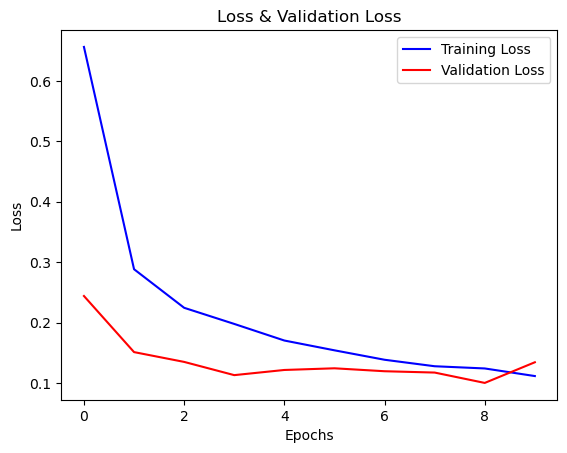

In [15]:
plt.plot(model.history.history["loss"], label='Training Loss', color='blue')
plt.plot(model.history.history["val_loss"], label='Validation Loss', color='red')
plt.title("Loss & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9737 - loss: 0.1513


5

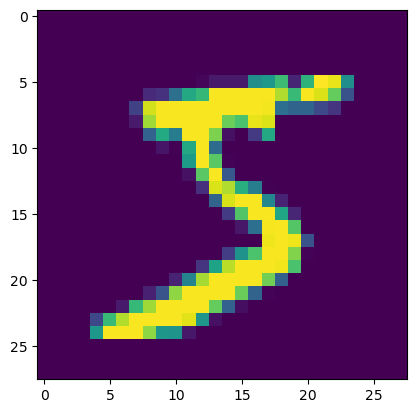

In [17]:
plt.imshow(X_train[0])
y_train[0]

In [18]:
pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [19]:
pred.shape

(10000, 10)

In [20]:
print(pred[0])

[7.0264595e-25 2.2021034e-06 9.9995929e-01 9.9978793e-01 1.2869471e-01
 5.6312026e-19 1.4735894e-26 1.0000000e+00 2.2277050e-08 1.0000000e+00]


In [21]:
np.argmax(pred[0])

7

In [22]:
pred_label = [np.argmax(i) for i in pred]

In [23]:
pred_label

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 5,
 3,
 5,
 5,
 5,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 5,
 1,
 3,
 5,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 5,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 5,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 5,
 0,
 3,
 4,
 4,
 5,
 3,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 5,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [24]:
cm = confusion_matrix(y_test, pred_label)

In [25]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    1,    1,    0,    1,    0,    4,    1,    2,    2],
       [   0, 1123,    3,    3,    0,    2,    2,    1,    1,    0],
       [   4,    0,  999,   16,    2,    0,    2,    6,    3,    0],
       [   0,    0,    0,  997,    0,    4,    0,    4,    2,    3],
       [   2,    1,    2,    0,  964,    0,    5,    0,    0,    8],
       [   3,    0,    0,   12,    1,  869,    3,    0,    2,    2],
       [   2,    3,    0,    1,   10,  424,  516,    0,    2,    0],
       [   0,    2,   12,    1,    0,    0,    0, 1003,    2,    8],
       [   6,    1,    3,   20,    8,   12,    0,    4,  903,   17],
       [   1,    4,    0,    4,   10,    3,    0,    2,    1,  984]])>

<Axes: >

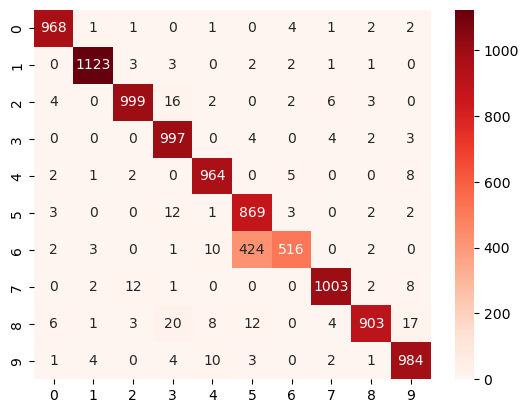

In [26]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")